# Diversified portfolio

This activity will involve calculating daily return data, standard deviation, annualized standard deviation, and Sharpe ratios as you analyze the risk and return metrics of 4 promising cryptocurrencyes:Bitcoin(BTC), Eyherium (ETH), Ripple (XPR), Litecoin (LTC);
as well as 3 flagman indexes: Dow Jones(DJIA), SnP500, NASDAQ100

Instructions:


1. Collect and organize data.


2. Analyze and visualize the data. Calculate Daily return, Mean, Cumulative return, STD of the portfolio. Use hvplot to create interactive visualizations 


3. Analyze risk. Calculate the annualized average daily return values, Standard deviations. Calculate and plot Sharpe ratio

References:

[Pandas std function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)

[NumPy sqrt function](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html)

[Pandas plot.bar function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)


## Step 1: Collect and organize data.

## Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation
import hvplot.pandas
import seaborn as sns


%matplotlib inline

##  Using the `read_csv` function and the `Path` module, read the csv files into a Pandas DataFrame, set a `DateTimeIndex`. Create and review the DataFrame for each asset class 

In [2]:
#Load the data for BTC
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

btc_df =  pd.read_csv(Path("./Resources/BTC_USD_2013-09-30_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

display(btc_df.head(-5) )

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-09-30      BTC           123.654990      124.304660      124.751660   
2013-10-01      BTC           125.455000      123.654990      125.758500   
2013-10-02      BTC           108.584830      125.455000      125.665660   
2013-10-03      BTC           118.674660      108.584830      118.675000   
2013-10-04      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-05-04      BTC         53658.843121    57218.805329    57246.891191   
2021-05-05      BTC         57252.702185    53270.229118    57977.613423   
2021-05-06      BTC         56583.849879    57459.052175    58368.682092   
2021-05-07      BTC         57107.120672    56439.133399    58724.110778   
2021-05-08      BTC         58788.209679    57419.147888    59575.463115   

            24h Low (USD)  
Date                       
2013-09-30     122.563490  
2013-10-01     123.633830  
2013-10-02      83.328330  
2013-10-03     107.058160  
2013-10-04     118.005660  
...                   ...  
2021-05-04   53613.595218  
2021-05-05   52987.158660  
2021-05-06   55330.727863  
2021-05-07   55320.958118  
2021-05-08   57028.498049  

[2778 rows x 5 columns]

In [3]:
#Load the data for ETH
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

eth_df = pd.read_csv(Path("./Resources/ETH_USD_2015-08-08_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

display(eth_df.head(-5) )

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2015-08-08      ETH             0.909046        1.749289        1.916540   
2015-08-09      ETH             0.692321        0.909046        0.909046   
2015-08-10      ETH             0.668067        0.692321        0.692321   
2015-08-11      ETH             0.850151        0.668067        1.148621   
2015-08-12      ETH             1.266023        0.850151        1.266023   
...             ...                  ...             ...             ...   
2021-05-04      ETH          3266.445548     3433.202285     3530.386628   
2021-05-05      ETH          3495.968343     3242.697268     3520.568716   
2021-05-06      ETH          3541.930575     3526.128072     3605.498436   
2021-05-07      ETH          3445.426739     3492.157543     3589.900862   
2021-05-08      ETH          3882.805260     3486.440013     3962.118330   

            24h Low (USD)  
Date                       
2015-08-08       0.794497  
2015-08-09       0.692321  
2015-08-10       0.654331  
2015-08-11       0.668067  
2015-08-12       0.850151  
...                   ...  
2021-05-04    3174.547411  
2021-05-05    3213.386842  
2021-05-06    3381.013116  
2021-05-07    3361.436536  
2021-05-08    3456.990603  

[2101 rows x 5 columns]

In [4]:
#Load the data for XRP
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

xrp_df = pd.read_csv(Path("./Resources/XRP_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

display(xrp_df.head(-5) )


Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2018-05-31      XRP             0.609705        0.616405        0.618404   
2018-06-01      XRP             0.617604        0.614872        0.621169   
2018-06-02      XRP             0.643043        0.624189        0.650921   
2018-06-03      XRP             0.667634        0.644291        0.677069   
2018-06-04      XRP             0.669680        0.690562        0.706326   
...             ...                  ...             ...             ...   
2021-05-04      XRP             1.394571        1.555764        1.558665   
2021-05-05      XRP             1.590046        1.389193        1.608413   
2021-05-06      XRP             1.639602        1.613795        1.764392   
2021-05-07      XRP             1.550022        1.603835        1.692895   
2021-05-08      XRP             1.589197        1.583141        1.629630   

            24h Low (USD)  
Date                       
2018-05-31       0.607282  
2018-06-01       0.608681  
2018-06-02       0.618503  
2018-06-03       0.640769  
2018-06-04       0.643054  
...                   ...  
2021-05-04       1.343032  
2021-05-05       1.369421  
2021-05-06       1.530335  
2021-05-07       1.510212  
2021-05-08       1.545000  

[1074 rows x 5 columns]

In [5]:
#Load the data for LTC
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

ltc_df = pd.read_csv(Path("./Resources/LTC_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

display(ltc_df.head(-5) )


Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2018-05-31      LTC           117.475053      118.974662      119.628628   
2018-06-01      LTC           119.934676      118.307052      120.452653   
2018-06-02      LTC           123.222694      120.171853      124.229394   
2018-06-03      LTC           125.365456      123.500674      127.920242   
2018-06-04      LTC           119.522003      124.869538      126.883812   
...             ...                  ...             ...             ...   
2021-05-04      LTC           304.168470      294.982485      327.686388   
2021-05-05      LTC           352.951239      305.540635      359.902613   
2021-05-06      LTC           343.844060      356.146518      364.764663   
2021-05-07      LTC           334.733168      354.637617      372.828513   
2021-05-08      LTC           350.084604      345.593016      357.223496   

            24h Low (USD)  
Date                       
2018-05-31     117.006761  
2018-06-01     117.390816  
2018-06-02     118.542360  
2018-06-03     122.112908  
2018-06-04     118.303633  
...                   ...  
2021-05-04     275.601134  
2021-05-05     301.440584  
2021-05-06     323.245237  
2021-05-07     334.489012  
2021-05-08     335.182769  

[1074 rows x 5 columns]

In [6]:
#Load the data for sp500
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

sp500_df = pd.read_csv(Path("./Resources/SP500.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)

display(sp500_df.head())



Closing Price (USD)
Date                           
2016-05-13              2046.61
2016-05-16              2066.66
2016-05-17              2047.21
2016-05-18              2047.63
2016-05-19              2040.04

In [7]:
#Load the data for Dow Jones
#Store the data into dataframes
#Print first and last 5 rows of each dataframe

djia_df = pd.read_csv(Path("./Resources/DJIA.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)

display(djia_df.head(-5))




Closing Price (USD)
Date                           
2016-05-13             17535.32
2016-05-16             17710.71
2016-05-17             17529.98
2016-05-18             17526.62
2016-05-19             17435.40
...                         ...
2021-04-30             33874.85
2021-05-03             34113.23
2021-05-04             34133.03
2021-05-05             34230.34
2021-05-06             34548.53

[1254 rows x 1 columns]

In [8]:
#Load the data for NASDAQ 100
#Store the data into dataframes
#Print first and last 5 rows of each dataframe
nasdaq100_df = pd.read_csv(Path("./Resources/NASDAQ100.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)

display(nasdaq100_df.head(-5))



Closing Price (USD)
Date                           
2016-05-16              4380.48
2016-05-17              4322.56
2016-05-18              4338.23
2016-05-19              4315.58
2016-05-20              4362.90
...                         ...
2021-05-03             13799.72
2021-05-04             13544.67
2021-05-05             13503.37
2021-05-06             13613.73
2021-05-07             13719.63

[1255 rows x 1 columns]

##  Select time period: slice the data: from 2018-05-31 up to a current date. Work on columns name and format to make sure they match

In [9]:
#Choose a timeperiod for analized data: from 2018-05-31 up to a current date
#Display new data frame

star_date_btc = btc_df.loc["2018-05-31" :]

star_date_eth = eth_df.loc["2018-05-31" :] 

star_date_xrp = xrp_df.loc["2018-05-31" :]

star_date_ltc = ltc_df.loc["2018-05-31" :]

start_date_sp500_df = sp500_df.loc["2018-05-31" :]

start_date_djia_df = djia_df.loc["2018-05-31" :]

start_date_nasdaq100_df = nasdaq100_df.loc["2018-05-31" :]



In [10]:
#Modyfy names for a colunms for indexes to be able to merge dataframes
#Display resulting dataframes

start_date_sp500_df['Currency'] = "SP500"
start_date_sp500_df = start_date_sp500_df.reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_sp500_df.head())


start_date_djia_df['Currency'] = "DJIA"
start_date_djia_df = start_date_djia_df .reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_djia_df.head())



start_date_nasdaq100_df['Currency'] = "NASDAQ100"
start_date_nasdaq100_df = start_date_nasdaq100_df.reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_nasdaq100_df.head())


/Users/nataliaburrey/opt/anaconda3/envs/pr1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Currency  Closing Price (USD)
Date                                    
2018-05-31    SP500              2705.27
2018-06-01    SP500              2734.62
2018-06-04    SP500              2746.87
2018-06-05    SP500              2748.80
2018-06-06    SP500              2772.35

/Users/nataliaburrey/opt/anaconda3/envs/pr1/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Currency  Closing Price (USD)
Date                                    
2018-05-31     DJIA             24415.84
2018-06-01     DJIA             24635.21
2018-06-04     DJIA             24813.69
2018-06-05     DJIA             24799.98
2018-06-06     DJIA             25146.39

/Users/nataliaburrey/opt/anaconda3/envs/pr1/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Currency  Closing Price (USD)
Date                                      
2018-05-31  NASDAQ100             6967.730
2018-06-01  NASDAQ100             7083.926
2018-06-04  NASDAQ100             7143.570
2018-06-05  NASDAQ100             7166.754
2018-06-06  NASDAQ100             7210.082

##  Create a new dataframe closing_prices_df which holds all closing prices of all of the assets using Pandas `concat` function.

In [11]:
# Create a new index for column names for crypto part of the portfolio

btc_closing_prices = star_date_btc.loc[:,["Currency","Closing Price (USD)"]]

eth_closing_prices = star_date_eth.loc[:,["Currency","Closing Price (USD)"]]

ltc_closing_prices = star_date_ltc.loc[:,["Currency","Closing Price (USD)"]]

xrp_closing_prices =  star_date_xrp.loc[:,["Currency","Closing Price (USD)"]]


In [12]:
#Create a new dataframe holding all of the assets
#Display a new dataframe

crypto_currencies_closing = [btc_closing_prices, eth_closing_prices, ltc_closing_prices, 
                             xrp_closing_prices, start_date_sp500_df, start_date_djia_df, start_date_nasdaq100_df]
crypto_currencies_closing 
closing_prices_df = pd.concat(crypto_currencies_closing) 
closing_prices_df

Currency  Closing Price (USD)
Date                                      
2018-05-31        BTC          7490.621250
2018-06-01        BTC          7518.333329
2018-06-02        BTC          7630.403388
2018-06-03        BTC          7716.145068
2018-06-04        BTC          7505.589277
...               ...                  ...
2021-05-10  NASDAQ100         13359.080000
2021-05-11  NASDAQ100         13351.270000
2021-05-12  NASDAQ100         13001.630000
2021-05-13  NASDAQ100         13109.150000
2021-05-14  NASDAQ100         13393.120000

[6550 rows x 2 columns]

## Step 2: Analyze and visualize the data. Calculate Daily return, Mean, Cumulative return, STD of the portfolio. Use hvplot to create interactive visualizations 

##  Create a new dataframe portfolio_closing_prices_df which holds all closing prices of all of the assets using Pandas `pivot` function. Clean the data with `dropna` function. 

In [13]:
# Use using Pandas `pivot` function to unify columns

portfolio_closing_prices_df = closing_prices_df.pivot(columns="Currency")

In [14]:
# Use using Pandas `dropna` function to clean the data

portfolio_closing_prices_df = portfolio_closing_prices_df.dropna()

In [15]:
# Change types of all of the columns to a float

portfolio_closing_prices_df['Closing Price (USD)'].astype(float)
portfolio_closing_prices_df.dtypes

                     Currency 
Closing Price (USD)  BTC          float64
                     DJIA         float64
                     ETH          float64
                     LTC          float64
                     NASDAQ100    float64
                     SP500        float64
                     XRP          float64
dtype: object

In [16]:
# Create 
portfolio_closing_prices_df.describe(include="all")

Closing Price (USD)                                         \
Currency                 BTC          DJIA          ETH         LTC   
count             744.000000    744.000000   744.000000  744.000000   
mean            13536.041607  27047.162379   461.812059   80.309239   
std             14206.852747   2682.448812   620.397370   56.759866   
min              3212.207081  18591.930000    83.368456   22.864239   
25%              6478.807799  25414.917500   171.343026   46.414786   
50%              8758.926890  26502.800000   226.913026   58.858453   
75%             11267.469496  28325.530000   409.072095   88.159547   
max             63346.789035  34777.760000  4132.757546  371.689785   

                                                 
Currency     NASDAQ100        SP500         XRP  
count       744.000000   744.000000  744.000000  
mean       9131.182586  3116.446895    0.367287  
std        2247.822243   419.026612    0.237358  
min        5899.355000  2237.400000    0.138613  
25%        7401.704250  2817.850000    0.245836  
50%        8013.779000  2978.570000    0.303275  
75%       11085.726500  3348.620000    0.433335  
max       14041.910000  4232.600000    1.809823

In [17]:

portfolio_closing_prices_df.columns

MultiIndex([('Closing Price (USD)',       'BTC'),
            ('Closing Price (USD)',      'DJIA'),
            ('Closing Price (USD)',       'ETH'),
            ('Closing Price (USD)',       'LTC'),
            ('Closing Price (USD)', 'NASDAQ100'),
            ('Closing Price (USD)',     'SP500'),
            ('Closing Price (USD)',       'XRP')],
           names=[None, 'Currency'])

## Visualize closing prices for all the assets using interactive hvplot

In [38]:
#Create hvplot for closing prices with nesessary indexes , include a title, profeccionaly organize the data
portfolio_closing_prices_df['Closing Price (USD)'].hvplot(x='Date',
                                 xlabel="Date", 
                                 title = "Cryptocurrencies",
                                 width = 1000,height=500)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [48]:
# create interactive hvplot with a choise of each asset

closing_prices_df.hvplot(x='Date', groupby="Currency", xlabel="Date", title = "Portfolio Display of the assets", width = 500,height=500)



:DynamicMap   [Currency]
   :Curve   [Date]   (Closing Price (USD))

## Using `dropna` and `pct_change` function to find daily return on the portfolio 

In [20]:
#calculate daily return of the portfolio and put the results into a new DataFrame return_portfolio_df 
#display new dataframe

return_portfolio_df = portfolio_closing_prices_df.pct_change().dropna()
return_portfolio_df

Closing Price (USD)                                          \
Currency                   BTC      DJIA       ETH       LTC NASDAQ100   
Date                                                                     
2018-06-01            0.003700  0.008985  0.011196  0.020937  0.016676   
2018-06-04           -0.001695  0.007245  0.024758 -0.003441  0.008420   
2018-06-05            0.015801 -0.000553  0.027522  0.021391  0.003245   
2018-06-06            0.004510  0.013968 -0.002714 -0.004864  0.006046   
2018-06-07            0.003442  0.003779 -0.004322  0.000044 -0.007940   
...                        ...       ...       ...       ...       ...   
2021-05-07            0.009248  0.006635 -0.027246 -0.026497  0.007779   
2021-05-10           -0.024368 -0.001005  0.160644  0.096708 -0.026280   
2021-05-11            0.015400 -0.013633  0.033470  0.012491 -0.000585   
2021-05-12           -0.078230 -0.019887 -0.013501 -0.092907 -0.026188   
2021-05-13           -0.045710  0.012915 -0.076006 -0.073251  0.008270   

                                
Currency       SP500       XRP  
Date                            
2018-06-01  0.010849  0.012955  
2018-06-04  0.004480  0.084320  
2018-06-05  0.000703  0.014023  
2018-06-06  0.008567 -0.008166  
2018-06-07 -0.000714  0.005555  
...              ...       ...  
2021-05-07  0.007373 -0.054635  
2021-05-10 -0.010436 -0.086326  
2021-05-11 -0.008674  0.026663  
2021-05-12 -0.021449 -0.066699  
2021-05-13  0.012173 -0.012137  

[743 rows x 7 columns]

##  Visualize daily returns

<AxesSubplot:title={'center':'Daily return'}, xlabel='Date'>

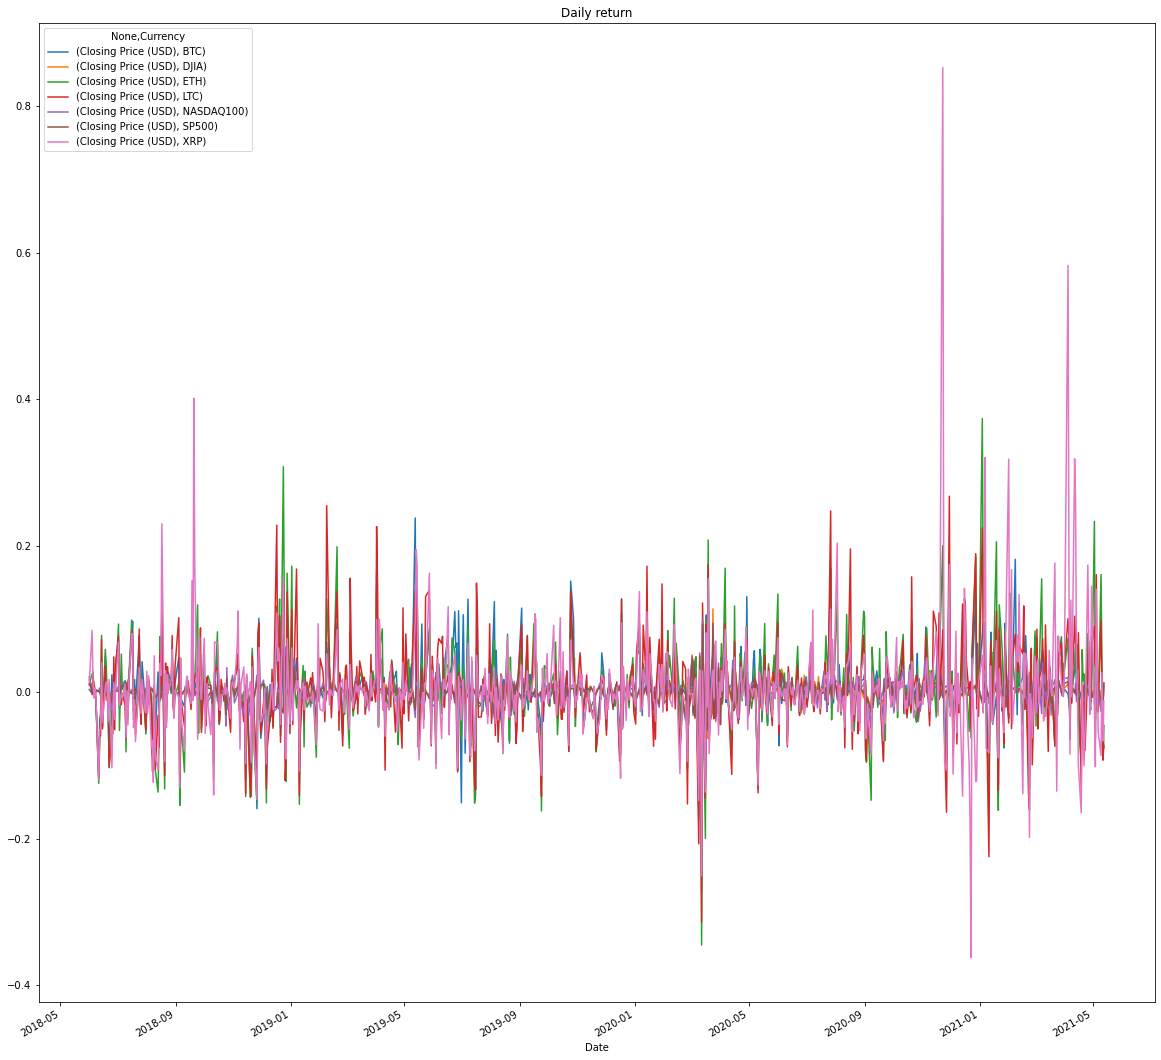

In [21]:
# visualise daily returns `return_portfolio_df` dataframe with plot function overlaying all assets
return_portfolio_df.plot(figsize = (20,20), title = "Daily return")

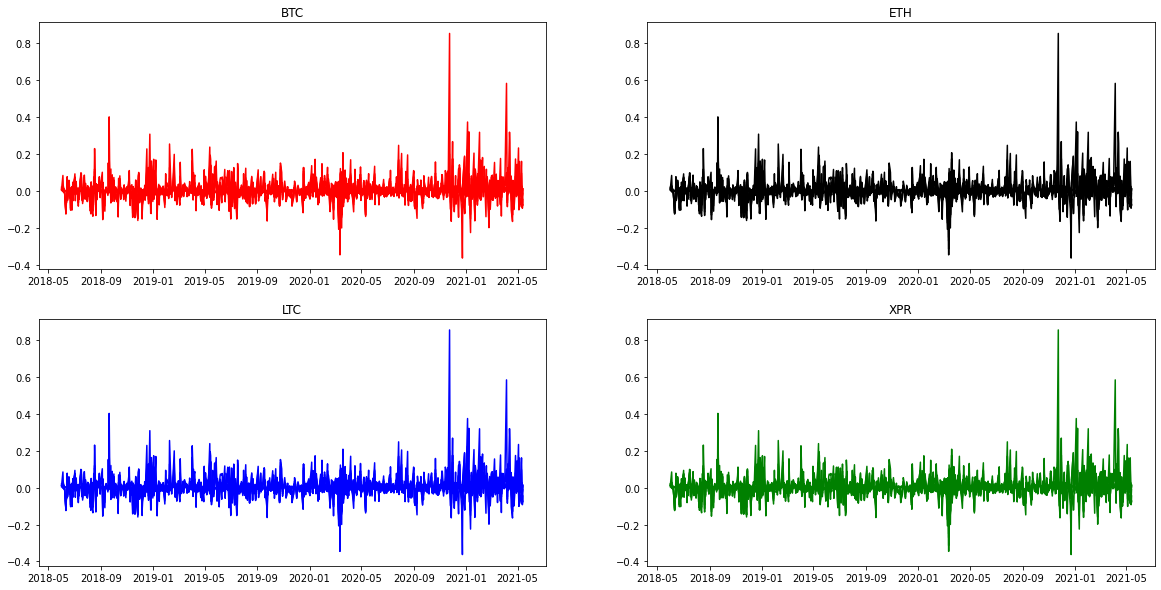

In [44]:
#visualize the data for cryptocurrency on the separate graphs side by side

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0,0].plot(return_portfolio_df['Closing Price (USD)'], c='r')
axs[0,0].set_title('BTC')
axs[0,1].plot(return_portfolio_df['Closing Price (USD)'],c='k')
axs[0,1].set_title('ETH')
axs[1,0].plot(return_portfolio_df['Closing Price (USD)'],c='b')
axs[1,0].set_title ('LTC')
axs[1,1].plot(return_portfolio_df['Closing Price (USD)'], c='g')
axs[1,1].set_title('XPR')
plt.show()

In [22]:
#visualize daily return dataframe with interactive box plot 
 
return_portfolio_df ['Closing Price (USD)'].hvplot.box(xlabel="Date", title = " Daily Returns volatily", width = 1000, height=500)


:BoxWhisker   [Variable]   (value)

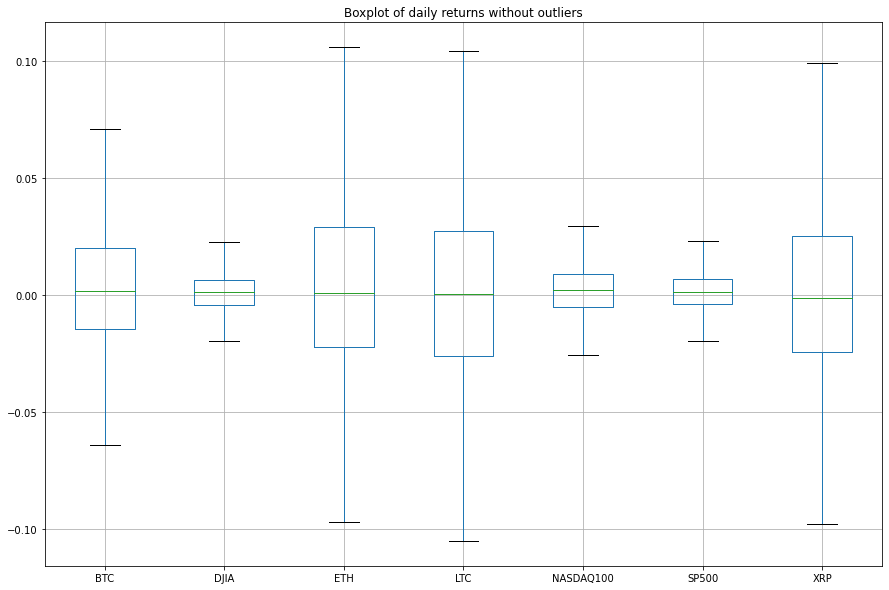

In [31]:
# Show return_portfolio_df dataframe in the boxplot without outliers to better understand volotility

return_portfolio_df ['Closing Price (USD)'].boxplot(showfliers=False, figsize=(15,10))
plt.title('Boxplot of daily returns without outliers')
plt.show()

 Based on the summary statistics and the box plot, the cryptocurrency with the smallest spread is BTC, and the one with the largest is XRP. This is validated by the values associated with the standard deviation summary statistics, generated with the describe function. The standard deviation of BTC is the smallest at 0.036975 while the standard deviation of XRP is the largets at 0.056952.  

##  Calculate and visualize cumulative returns 

In [23]:
#calculate Cumulative returns

cumulative_returns_df = (1 +  return_portfolio_df).cumprod().dropna() 

cumulative_returns_df.head()


Closing Price (USD)                                          \
Currency                   BTC      DJIA       ETH       LTC NASDAQ100   
Date                                                                     
2018-06-01            1.003700  1.008985  1.011196  1.020937  1.016676   
2018-06-04            1.001998  1.016295  1.036232  1.017425  1.025236   
2018-06-05            1.017831  1.015733  1.064750  1.039188  1.028564   
2018-06-06            1.022421  1.029921  1.061861  1.034133  1.034782   
2018-06-07            1.025940  1.033813  1.057271  1.034179  1.026566   

                                
Currency       SP500       XRP  
Date                            
2018-06-01  1.010849  1.012955  
2018-06-04  1.015377  1.098367  
2018-06-05  1.016091  1.113770  
2018-06-06  1.024796  1.104675  
2018-06-07  1.024064  1.110812

In [49]:
#plot the cumulative returns into interactive plot

cumulative_returns_df['Closing Price (USD)'].hvplot(title="Cumulative Returns", width = 800, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

##  Calculate mean value and standard deviation for each asset class 

In [25]:
#display the mean value of each asset on the portfolio

return_portfolio_df.mean()

                     Currency 
Closing Price (USD)  BTC          0.003550
                     DJIA         0.000564
                     ETH          0.004285
                     LTC          0.003126
                     NASDAQ100    0.000993
                     SP500        0.000671
                     XRP          0.003426
dtype: float64

In [26]:
#display the standard deviation of each asset on the portfolio

return_portfolio_df.std()

                     Currency 
Closing Price (USD)  BTC          0.044661
                     DJIA         0.015296
                     ETH          0.059263
                     LTC          0.060329
                     NASDAQ100    0.016840
                     SP500        0.014611
                     XRP          0.072538
dtype: float64

##  Calculate and visualize correlation of the assets in the portfolio

In [27]:
#Explore correlation of the assets withing the portfolio

correlation_cryptocurrencies =  return_portfolio_df.corr()
correlation_cryptocurrencies

Closing Price (USD)                      \
Currency                                      BTC      DJIA       ETH   
                    Currency                                            
Closing Price (USD) BTC                  1.000000  0.173690  0.763228   
                    DJIA                 0.173690  1.000000  0.207660   
                    ETH                  0.763228  0.207660  1.000000   
                    LTC                  0.781240  0.179523  0.813104   
                    NASDAQ100            0.183298  0.844429  0.202696   
                    SP500                0.185274  0.973383  0.212004   
                    XRP                  0.460920  0.165519  0.566911   

                                                                       
Currency                            LTC NASDAQ100     SP500       XRP  
                    Currency                                           
Closing Price (USD) BTC        0.781240  0.183298  0.185274  0.460920  
                    DJIA       0.179523  0.844429  0.973383  0.165519  
                    ETH        0.813104  0.202696  0.212004  0.566911  
                    LTC        1.000000  0.188100  0.189586  0.534877  
                    NASDAQ100  0.188100  1.000000  0.927506  0.176465  
                    SP500      0.189586  0.927506  1.000000  0.176517  
                    XRP        0.534877  0.176465  0.176517  1.000000

<AxesSubplot:xlabel='None-Currency', ylabel='None-Currency'>

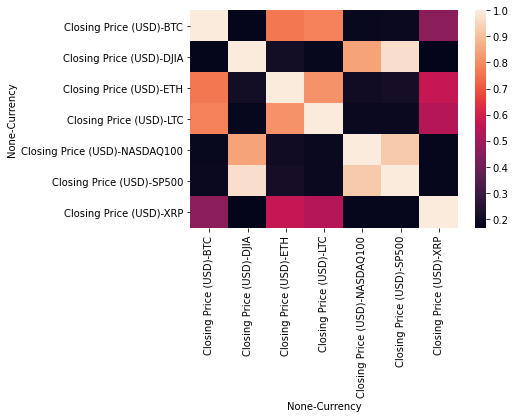

In [46]:
#Visualize the correlation
#correlation_cryptocurrencies["Closing Price (USD)"].hvplot.heatmap( x= "Currency", y="Currency", width = 1000, height=500)
sns.heatmap(correlation_cryptocurrencies )

## Step 3. Analyze risk. Calculate the annualized average daily return values, Standard deviations. Calculate and plot Sharpe ratio

##  Calculate the annualized average daily return values and sort the values from smallest to largest.

In [33]:
# The number of trading days is set to 252 for use throughout these calculations
trading_days = 252

# Calculate the annual average daily returns for the crypto currencies
# Use the Pandas mean function to calculate the average daily return for each cryptocurrency 
# Then multiply that value by the number of trading days in a year, using the trading_days variable set above 
annual_average_returns = return_portfolio_df.mean() * trading_days

# Sort the annual average returns for the cryptocurrencies from lowest to highest
annual_average_returns.sort_values()

                     Currency 
Closing Price (USD)  DJIA         0.142218
                     SP500        0.169157
                     NASDAQ100    0.250343
                     LTC          0.787671
                     XRP          0.863335
                     BTC          0.894705
                     ETH          1.079869
dtype: float64

## Calculate the annualized standard deviations for the DataFrame of portfolio daily returns. Sort the values from smallest to largest.

In [34]:
# Calculate the annualized standard deviation for the cryptocurrencies
# Use the Pandas std function to calculate the standard deviation for each cryptocurrency
# Multiply the standard deviation by the square root (using the NumPy sqrt function) of the number of trading days
annual_standard_deviation = return_portfolio_df.std() * np.sqrt(trading_days)

# Sort the annual standard deviations for the cryptocurrencies from lowest to highest
annual_standard_deviation.sort_values()

                     Currency 
Closing Price (USD)  SP500        0.231942
                     DJIA         0.242816
                     NASDAQ100    0.267328
                     BTC          0.708965
                     ETH          0.940776
                     LTC          0.957691
                     XRP          1.151510
dtype: float64

##  Calculate the Sharpe ratio for each asset. Sort the Sharpe ratios from smallest to largest.

In [35]:
# Calculate Sharpe ratios by dividing the annual average return of the cryptocurrencies 
# by the annual standard deviation of the cryptocurrencies
sharpe_ratios = annual_average_returns / annual_standard_deviation

# Sort the Sharpe ratios for the cryptocurrencies from lowest to highest
sharpe_ratios.sort_values()

                     Currency 
Closing Price (USD)  DJIA         0.585705
                     SP500        0.729310
                     XRP          0.749741
                     LTC          0.822469
                     NASDAQ100    0.936463
                     ETH          1.147849
                     BTC          1.261987
dtype: float64

##  Plot the Sharpe ratios in a bar chart.

<AxesSubplot:title={'center':'Sharpe Ratios'}, xlabel='None,Currency'>

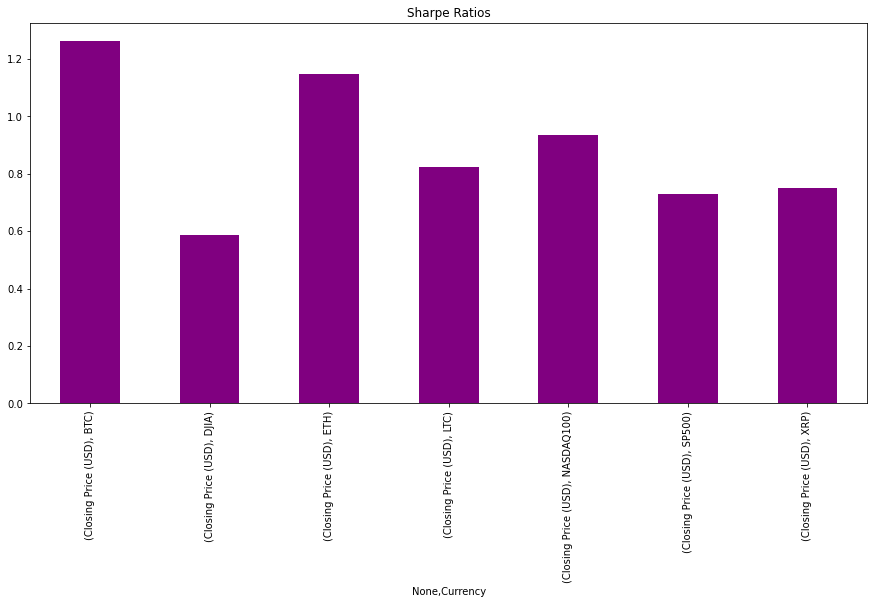

In [37]:
# Using the Pandas plot.bar function, visualize the Sharpe ratios for the cryptocurrencies in a bar chart
# Be sure to adjust the figure size and include a title
sharpe_ratios.plot.bar(figsize=(15, 7), title="Sharpe Ratios", color="purple")

The cryptocurrencies have all behaved very well over the period in question posting a excellent risk to return values. Based on the both the Sharpe ratio I would have to suggest BTC as the primay investment for the firm because it has the lowest standard deviation (at 0.586954 ) and therefore the lowest voltatility, and the highest Sharpe ratio at 1.049351. 